### 1. Setup and Load Data

#### 1.1 Install dependencies and setup

In [3]:
import tensorflow as tf
import os

In [4]:
os.path.join('data','happy')

'data\\happy'

In [5]:
# gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)

#### 1.2 Remove dodgy images

In [6]:
import cv2
from matplotlib import pyplot as plt
# import imghdr

In [7]:
data_dir = 'data'

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [15]:
img_ext = ['JPEG', 'JPG', 'BMP', 'PNG']

In [16]:
img = cv2.imread(os.path.join(data_dir,"happy",'170404-happy-workers-feature.jpg'))
img = img.T
img = img.T

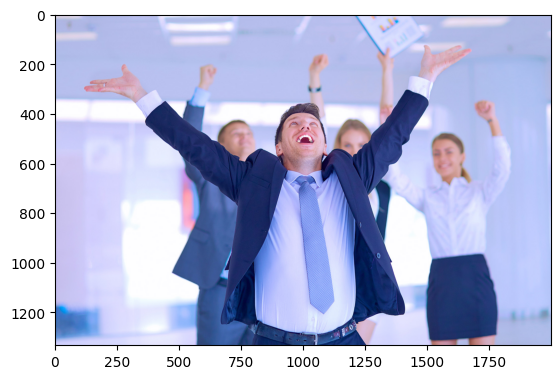

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 1.2.1 Testing the Pillow library since imghdr is deprecated

In [23]:
from PIL import Image
img = Image.open(os.path.join(data_dir,"sad",'depositphotos_161575148-stock-photo-african-american-man-looking-at.jpg')).format
img

'WEBP'

#### 1.2.2. Cleaning the images with different extensions than what we use

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            typ = Image.open(image_path).format
            if typ not in img_ext : 
                print("Image not in the extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))

Issue with imagedata\happy\.ipynb_checkpoints
Image not in the extension list data\sad\depositphotos_161575148-stock-photo-african-american-man-looking-at.jpg
Image not in the extension list data\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in the extension list data\sad\depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg


#### 1.3 Load Data

In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 186 files belonging to 2 classes.


In [31]:
## To iterate through dataset we made
data_iterator = data.as_numpy_iterator()

In [40]:
## To make batch of images.
batch = data_iterator.next()

In [41]:
## Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [42]:
batch[1]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

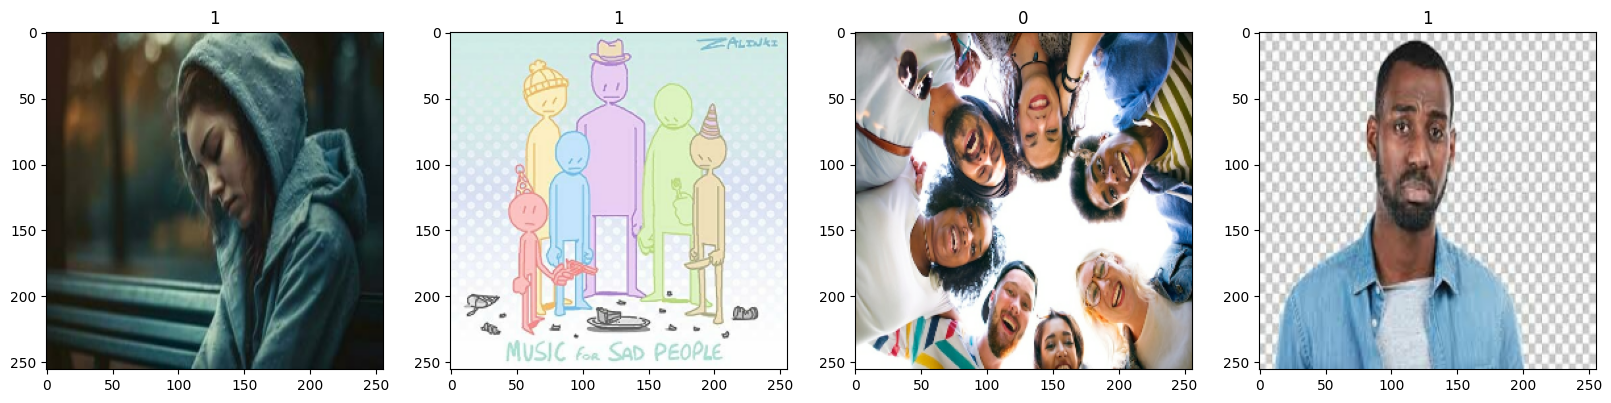

In [43]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])